In [ ]:
pip install pandas_datareader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to your CSV file in your Google Drive
file_path = '/content/drive/MyDrive/CS501/macro_monthly_clean.csv'

# Read the CSV file into a DataFrame
macro_monthly_df = pd.read_csv(file_path)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
from pandas_datareader import data

In [ ]:
# Data preprocessing (if not already done)
# Convert 'DATE' column to datetime
macro_monthly_df['DATE'] = pd.to_datetime(macro_monthly_df['DATE'])

# Set 'DATE' as the index
macro_monthly_df.set_index('DATE', inplace=True)

In [ ]:
# Train/Validation split
train_data = macro_monthly_df[macro_monthly_df.index < '2021-01-01']
validation_data = macro_monthly_df[(macro_monthly_df.index >= '2021-01-01') & (macro_monthly_df.index < '2022-01-01')]

In [ ]:
#SARIMAX UNIVARIATE
def run_sarimax_and_evaluate(train_data, validation_data, p, d, q, P, D, Q, S):
    # Define the SARIMAX model with the specified orders
    model = SARIMAX(train_data['unrate'],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, S))

    # Fit the model
    results = model.fit()

    # Make predictions on the validation data
    predicted = results.get_forecast(steps=len(validation_data))

    # Convert predicted to a pandas Series
    predicted_series = pd.Series(predicted.predicted_mean, index=validation_data.index)

    # Calculate MAE and MSE
    mae = mean_absolute_error(validation_data['unrate'], predicted_series)
    mse = mean_squared_error(validation_data['unrate'], predicted_series)

    # Filter actual and predicted data for only the year 2021
    validation_data_2021 = validation_data['2021']
    predicted_series_2021 = predicted_series['2021']

    # Create a range of indices for the x-axis for the 2021 data
    x_values = range(len(validation_data_2021))

    # Plot the actual values vs. predicted values for the year 2021
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, validation_data_2021['unrate'], label='Actual', marker='o')
    plt.plot(x_values, predicted_series_2021, label='Predicted', marker='x')
    plt.xticks(x_values, validation_data_2021.index.strftime('2021-%m'), rotation=45)
    plt.xlabel('Month of 2021')
    plt.ylabel('Unemployment Rate')
    plt.title('Actual vs. Predicted Unemployment Rate for 2021 - SARIMAX Univariate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return mae, mse


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-49-5f01b4fa940d>:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single st

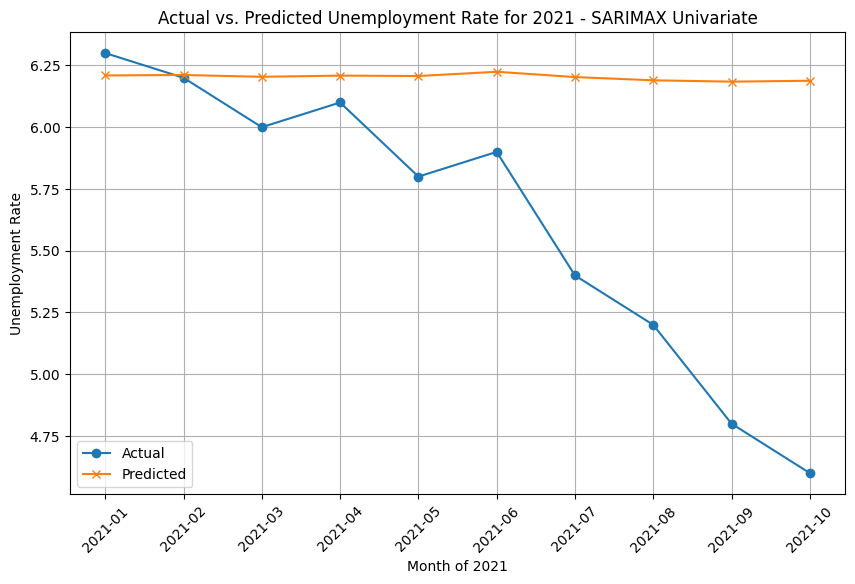

Mean Absolute Error (MAE): 1.722273149830832
Mean Squared Error (MSE): 4.56668212552228


In [ ]:
# Example usage with different model orders
p1, d1, q1, P1, D1, Q1, S1 = 1, 1, 1, 1, 1, 1, 12
mae1, mse1 = run_sarimax_and_evaluate(train_data, validation_data, p1, d1, q1, P1, D1, Q1, S1)

print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-45-33dd09e11945>:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  validation_data_2021 = validation_data['2021']


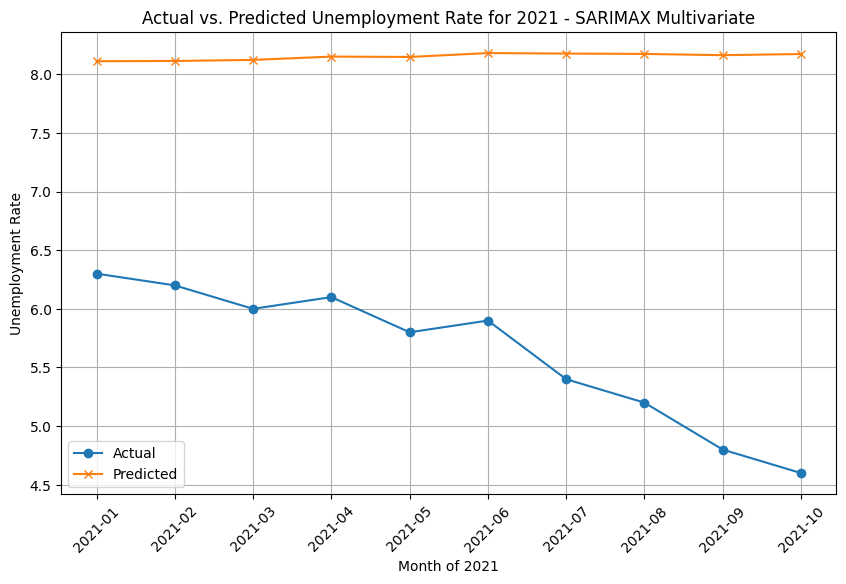

Mean Absolute Error (MAE): 2.7738949510063775
Mean Squared Error (MSE): 9.600702437620512


In [ ]:
#order 2
p2, d2, q2, P2, D2, Q2, S2 = 2, 1, 2, 2, 1, 2, 12
mae2, mse2 = run_sarimax_and_evaluate(train_data, validation_data, p2, d2, q2, P2, D2, Q2, S2)


print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-45-33dd09e11945>:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  validation_data_2021 = validation_data['2021']


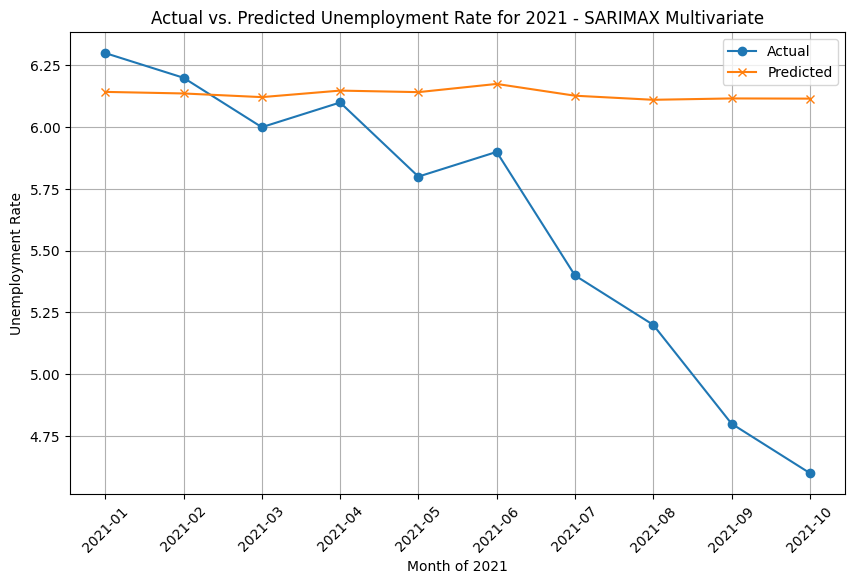

Mean Absolute Error (MAE): 1.6700404978962857
Mean Squared Error (MSE): 4.437339720421051


In [ ]:
#order 3
p3, d3, q3, P3, D3, Q3, S3 = 1, 1, 2, 1, 1, 2, 12
mae3, mse3 = run_sarimax_and_evaluate(train_data, validation_data, p3, d3, q3, P3, D3, Q3, S3)

print("Mean Absolute Error (MAE):", mae3)
print("Mean Squared Error (MSE):", mse3)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

def find_optimal_sarimax_order(train_data, validation_data, max_iterations=100):
    best_mae = float('inf')
    best_mse = float('inf')
    best_order = None
    iterations = 0

    for p in range(1, 4):  # Adjust the range as needed
        for d in range(2):
            for q in range(3):  # Adjust the range as needed
                for P in range(1, 4):  # Adjust the range as needed
                    for D in range(2):
                        for Q in range(3):  # Adjust the range as needed
                            S = 12  # Seasonal order

                            # Try the SARIMAX model with the current orders
                            model = SARIMAX(train_data['unrate'],
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, S))
                            results = model.fit()

                            # Make predictions on the validation data
                            predicted = results.get_forecast(steps=len(validation_data))

                            # Calculate MAE and MSE
                            mae = mean_absolute_error(validation_data['unrate'], predicted.predicted_mean)
                            mse = mean_squared_error(validation_data['unrate'], predicted.predicted_mean)

                            # Check if MAE and MSE are below 1
                            if mae < 1 and mse < 1:
                                return p, d, q, P, D, Q, S, mae, mse

                            # Update best values if needed
                            if mae < best_mae and mse < best_mse:
                                best_mae = mae
                                best_mse = mse
                                best_order = (p, d, q, P, D, Q, S)

                            iterations += 1
                            if iterations >= max_iterations:
                                return best_order + (best_mae, best_mse)

    return best_order + (best_mae, best_mse)

# Find the optimal SARIMAX order
optimal_order = find_optimal_sarimax_order(train_data, validation_data)
print("Optimal SARIMAX Order:", optimal_order)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimal SARIMAX Order: (1, 0, 0, 1, 0, 0, 12, 0.7061178399580362, 0.7654020295211159)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


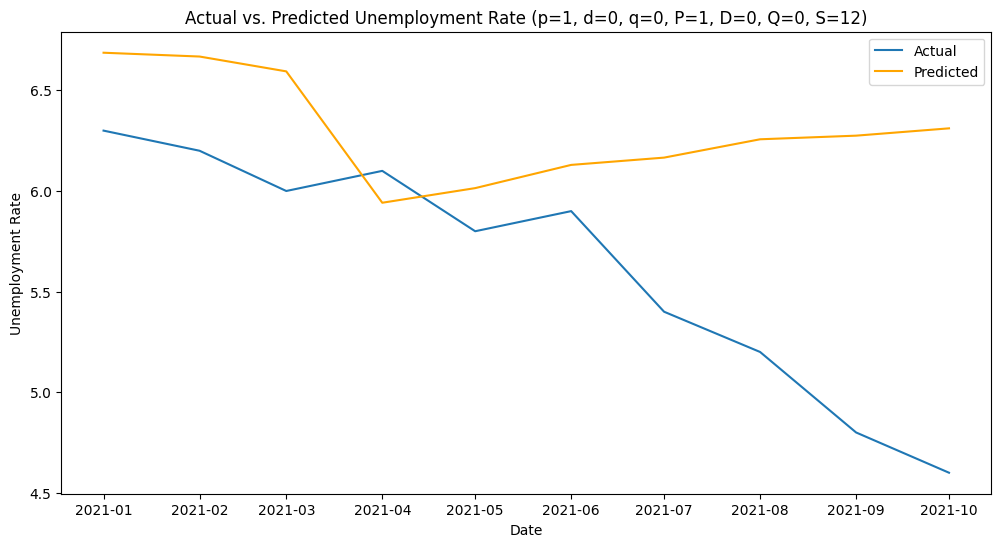

Mean Absolute Error (MAE): 0.7061178399580362
Mean Squared Error (MSE): 0.7654020295211159


In [ ]:
#order 4
p4, d4, q4, P4, D4, Q4, S4 = 1, 0, 0, 1, 0, 0, 12
mae4, mse4 = run_sarimax_and_evaluate(train_data, validation_data, p4, d4, q4, P4, D4, Q4, S4)

print("Mean Absolute Error (MAE):", mae4)
print("Mean Squared Error (MSE):", mse4)

In [ ]:
#Exogenous Variables
start_date = datetime.datetime(1981, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

#Fetch GDP data (Quarterly). 'GDP' is the code for the U.S. GDP on FRED.
gdp_data = data.DataReader("GDP", "fred", start_date, end_date)

#Fetch Crude Oil Prices (West Texas Intermediate - WTI) from FRED. 'WTISPLC' is its code.
oil_data = data.DataReader("WTISPLC", "fred", start_date, end_date)

# Merge the GDP and Oil data to existing dataframe
existing_data = pd.read_csv(file_path, parse_dates=['DATE'])
merged_data = pd.merge(existing_data, gdp_data, how='left', left_on='DATE', right_on=gdp_data.index)
merged_data = pd.merge(merged_data, oil_data, how='left', left_on='DATE', right_on=oil_data.index)
merged_data['GDP'] = merged_data['GDP'].interpolate(method='linear')
#print(merged_data)

# Convert 'DATE' column to datetime
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Set 'DATE' as the index
merged_data.set_index('DATE', inplace=True)

# Train/Validation split
train_data = merged_data[merged_data.index < '2021-01-01']
validation_data = merged_data[(merged_data.index >= '2021-01-01') & (merged_data.index < '2022-01-01')]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-38-9df6dbca701f>:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  validation_data_2021 = validation_data['2021']


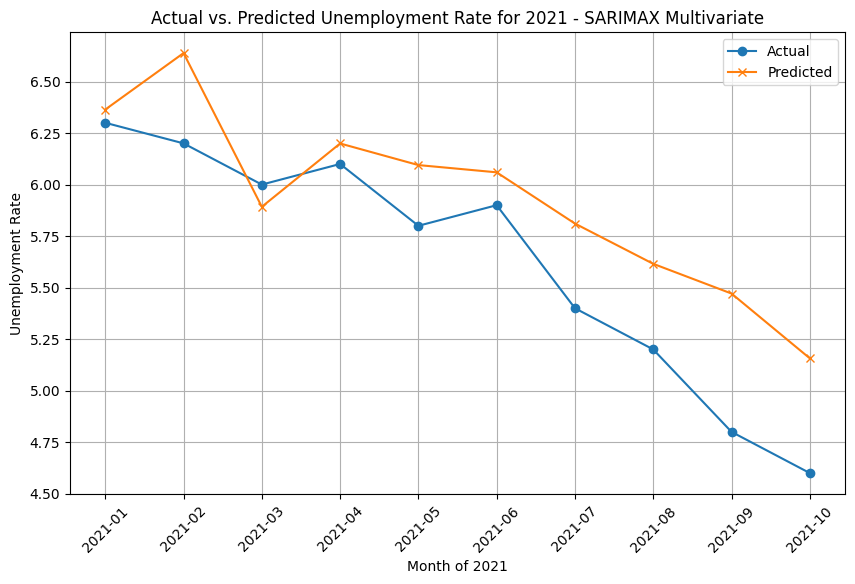

Mean Absolute Error (MAE): 1.6092564731042176
Mean Squared Error (MSE): 3.531055287532875


In [ ]:
def run_sarimax_and_evaluate_multivariate(train_data, validation_data, p, d, q, P, D, Q, S, exog_columns):
    # Define the SARIMAX model with the specified orders and exogenous variables
    model = SARIMAX(train_data['unrate'],
                    exog=train_data[exog_columns],
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, S))

    # Fit the model
    results = model.fit()

    # Make predictions on the validation data
    predicted = results.get_forecast(steps=len(validation_data), exog=validation_data[exog_columns])

    # Convert predicted to a pandas Series
    predicted_series = pd.Series(predicted.predicted_mean, index=validation_data.index)

    # Calculate MAE, MAPE, and MSE
    mae = mean_absolute_error(validation_data['unrate'], predicted_series)
    mse = mean_squared_error(validation_data['unrate'], predicted_series)

    # Filter actual and predicted data for only the year 2021
    validation_data_2021 = validation_data['2021']
    predicted_series_2021 = predicted_series['2021']

    # Create a range of indices for the x-axis for the 2021 data
    x_values = range(len(validation_data_2021))

    # Plot the actual values vs. predicted values for the year 2021
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, validation_data_2021['unrate'], label='Actual', marker='o')
    plt.plot(x_values, predicted_series_2021, label='Predicted', marker='x')
    plt.xticks(x_values, validation_data_2021.index.strftime('2021-%m'), rotation=45)
    plt.xlabel('Month of 2021')
    plt.ylabel('Unemployment Rate')
    plt.title('Actual vs. Predicted Unemployment Rate for 2021 - SARIMAX Multivariate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return mae, mse

# Set the orders for SARIMAX
p, d, q, P, D, Q, S = 1, 1, 1, 1, 1, 1, 12

# Set the columns for exogenous variables
exog_columns = ['psr', 'm2', 'dspic', 'pce', 'ir', 'ffer', 'indpro', 'ccpi', 'GDP', 'WTISPLC']

# Assuming 80% of the data is for training and the rest for validation
train_size = int(0.8 * len(merged_data))
train_data = merged_data.iloc[:train_size]
validation_data = merged_data.iloc[train_size:]

mae, mse = run_sarimax_and_evaluate_multivariate(train_data, validation_data, p, d, q, P, D, Q, S, exog_columns)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
